# 05 - Prophet Modeling

Goal:
- Fit Prophet on sales data at different granularities (weekly, daily, monthly)
- Forecast a test horizon
- Evaluate RMSE/MAE
- Visualize forecasts and Prophet components (trend + seasonality)
- Compare Prophet results with ARIMA and across granularities


In [107]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Paths
OUT_DIR = "../outputs"
FC_DIR = os.path.join(OUT_DIR, "forecasts")
FIG_DIR = os.path.join(OUT_DIR, "figures")
METRICS_DIR = os.path.join(OUT_DIR, "metrics")

os.makedirs(FC_DIR, exist_ok=True)
os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(METRICS_DIR, exist_ok=True)


## Section A: Weekly Prophet

Goal:
- Fit Prophet on weekly sales (`sales_weekly.csv`)
- Forecast last 26 weeks (same horizon as ARIMA)
- Evaluate RMSE/MAE
- Visualize forecast and Prophet components (trend, yearly seasonality)
- Compare directly with ARIMA results


14:58:33 - cmdstanpy - INFO - Chain [1] start processing
14:58:33 - cmdstanpy - INFO - Chain [1] done processing


Model         RMSE         MAE
0  Prophet (weekly)  6501.685911  5286.50716

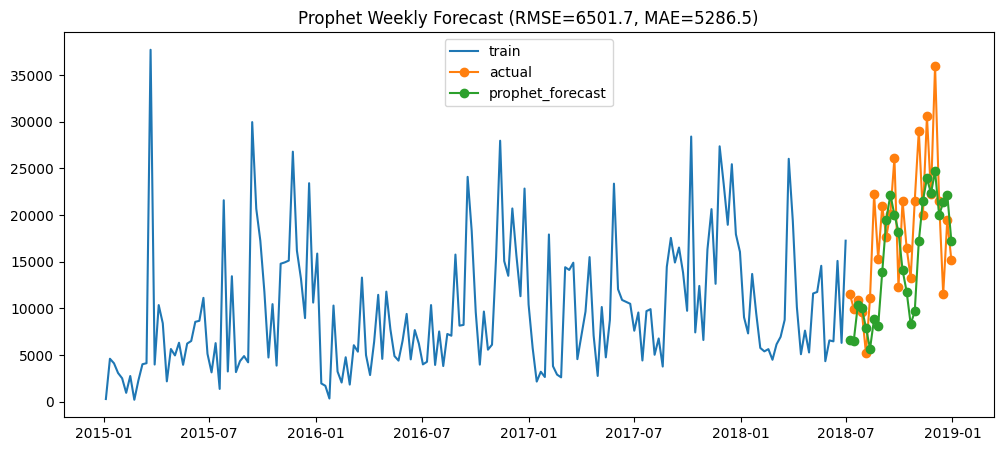

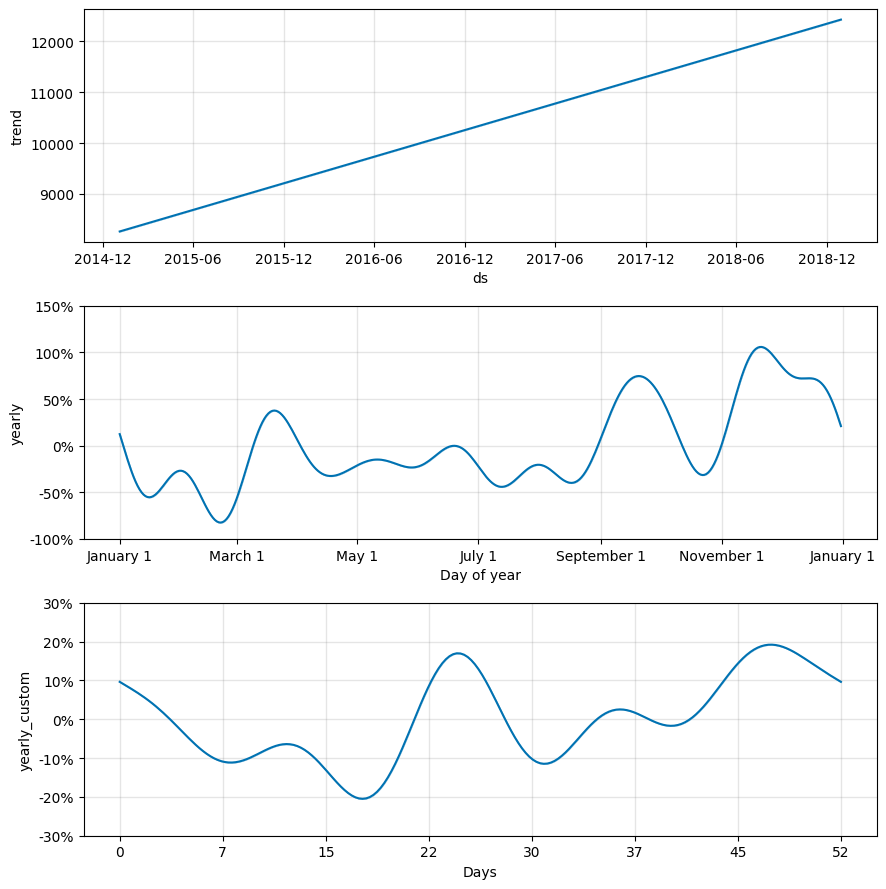

In [109]:
# Load weekly data
df_weekly = pd.read_csv("../data/processed/sales_weekly.csv", parse_dates=['order_date'])
df_weekly = df_weekly.rename(columns={'order_date':'ds','sales':'y'})
df_weekly = df_weekly.set_index('ds').asfreq('W').reset_index()

# Train/test split
test_periods = 26
train_weekly = df_weekly.iloc[:-test_periods].copy()
test_weekly  = df_weekly.iloc[-test_periods:].copy()

# Fit model
m_weekly = Prophet(yearly_seasonality=True, weekly_seasonality=False, seasonality_mode='multiplicative')
m_weekly.add_seasonality(name='yearly_custom', period=52, fourier_order=5)
m_weekly.fit(train_weekly)

# Forecast
future_weekly = m_weekly.make_future_dataframe(periods=test_periods, freq='W')
forecast_weekly = m_weekly.predict(future_weekly)
pred_weekly = forecast_weekly.set_index('ds')['yhat'].loc[test_weekly['ds'].min(): test_weekly['ds'].max()]
pred_weekly = pred_weekly.reindex(test_weekly['ds']).astype(float)

# Metrics
rmse_weekly = np.sqrt(mean_squared_error(test_weekly['y'].values, pred_weekly.values))
mae_weekly = mean_absolute_error(test_weekly['y'].values, pred_weekly.values)

metrics_weekly = pd.DataFrame({
    "Model":["Prophet (weekly)"],
    "RMSE":[rmse_weekly],
    "MAE":[mae_weekly]
})
display(metrics_weekly)

metrics_weekly.to_csv(os.path.join(METRICS_DIR, "prophet_weekly_metrics.csv"), index=False)
pred_weekly.to_csv(os.path.join(FC_DIR, "prophet_weekly_forecast.csv"), header=True)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train_weekly['ds'], train_weekly['y'], label="train")
plt.plot(test_weekly['ds'], test_weekly['y'], label="actual", marker='o')
plt.plot(pred_weekly.index, pred_weekly.values, label="prophet_forecast", marker='o')
plt.legend()
plt.title(f"Prophet Weekly Forecast (RMSE={rmse_weekly:.1f}, MAE={mae_weekly:.1f})")
plt.savefig(os.path.join(FIG_DIR, "prophet_weekly_forecast.png"))
plt.show()

# Components
m_weekly.plot_components(forecast_weekly)
plt.savefig(os.path.join(FIG_DIR, "prophet_weekly_components.png"))
plt.show()


## Section B: Daily Prophet

Goal:
- Fit Prophet on daily sales (`sales_daily.csv`)
- Forecast last 90 days
- Evaluate RMSE/MAE
- Visualize forecast and Prophet components (trend, weekly, yearly)
- Compare with weekly Prophet and ARIMA


14:58:37 - cmdstanpy - INFO - Chain [1] start processing
14:58:37 - cmdstanpy - INFO - Chain [1] done processing


Model         RMSE          MAE
0  Prophet (daily)  2904.041781  2095.196368

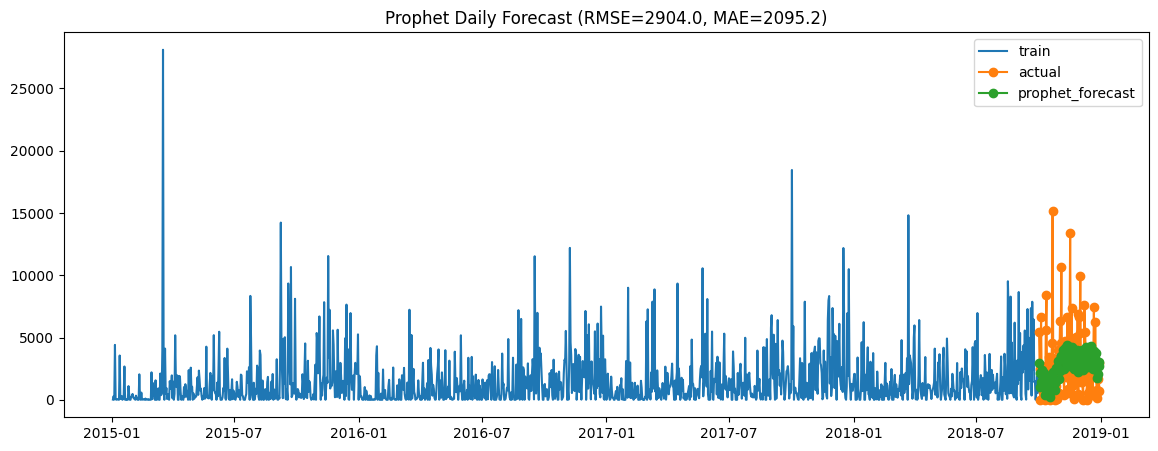

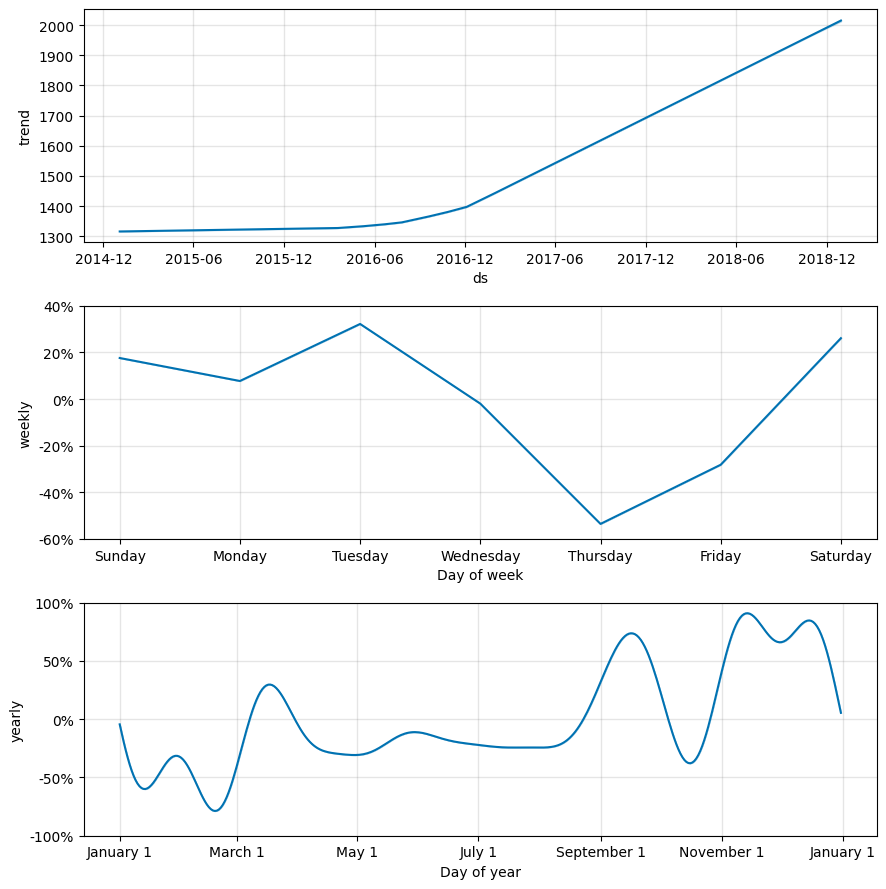

In [111]:
# Load daily data
df_daily = pd.read_csv("../data/processed/sales_daily.csv", parse_dates=['order_date'])
df_daily = df_daily.rename(columns={'order_date':'ds','sales':'y'})
df_daily = df_daily.set_index('ds').asfreq('D').reset_index()

# Train/test split
test_periods = 90
train_daily = df_daily.iloc[:-test_periods].copy()
test_daily  = df_daily.iloc[-test_periods:].copy()

# Fit model
m_daily = Prophet(yearly_seasonality=True, weekly_seasonality=True, seasonality_mode='multiplicative')
m_daily.fit(train_daily)

# Forecast
future_daily = m_daily.make_future_dataframe(periods=test_periods, freq='D')
forecast_daily = m_daily.predict(future_daily)
pred_daily = forecast_daily.set_index('ds')['yhat'].loc[test_daily['ds'].min(): test_daily['ds'].max()]
pred_daily = pred_daily.reindex(test_daily['ds']).astype(float)

# Metrics
rmse_daily = np.sqrt(mean_squared_error(test_daily['y'].values, pred_daily.values))
mae_daily = mean_absolute_error(test_daily['y'].values, pred_daily.values)

metrics_daily = pd.DataFrame({
    "Model":["Prophet (daily)"],
    "RMSE":[rmse_daily],
    "MAE":[mae_daily]
})
display(metrics_daily)

metrics_daily.to_csv(os.path.join(METRICS_DIR, "prophet_daily_metrics.csv"), index=False)
pred_daily.to_csv(os.path.join(FC_DIR, "prophet_daily_forecast.csv"), header=True)

# Plot
plt.figure(figsize=(14,5))
plt.plot(train_daily['ds'], train_daily['y'], label="train")
plt.plot(test_daily['ds'], test_daily['y'], label="actual", marker='o')
plt.plot(pred_daily.index, pred_daily.values, label="prophet_forecast", marker='o')
plt.legend()
plt.title(f"Prophet Daily Forecast (RMSE={rmse_daily:.1f}, MAE={mae_daily:.1f})")
plt.savefig(os.path.join(FIG_DIR, "prophet_daily_forecast.png"))
plt.show()

# Components
m_daily.plot_components(forecast_daily)
plt.savefig(os.path.join(FIG_DIR, "prophet_daily_components.png"))
plt.show()


## Section C: Monthly Prophet

Goal:
- Fit Prophet on monthly sales (`sales_monthly.csv`)
- Forecast last 12 months
- Evaluate RMSE/MAE
- Visualize forecast and Prophet components
- Compare with daily and weekly Prophet


14:58:41 - cmdstanpy - INFO - Chain [1] start processing
14:58:41 - cmdstanpy - INFO - Chain [1] done processing


Model          RMSE           MAE
0  Prophet (monthly)  16279.836113  12597.907619

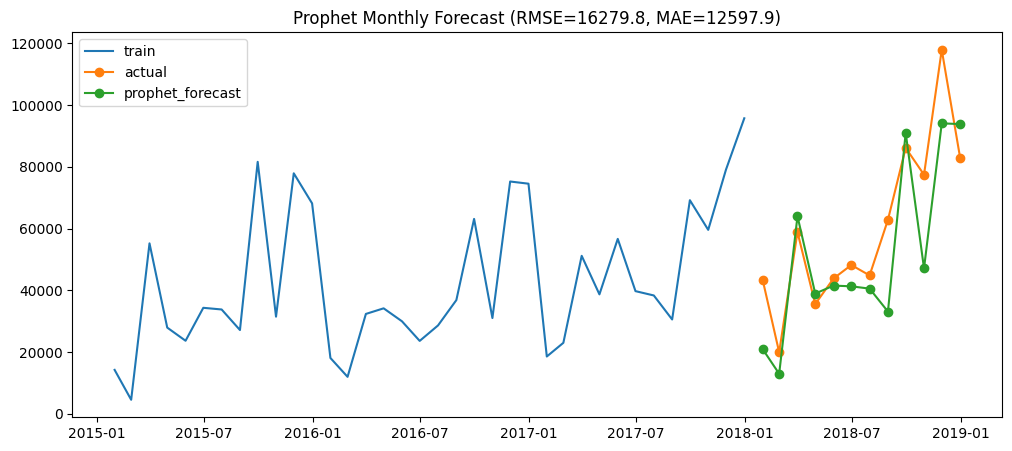

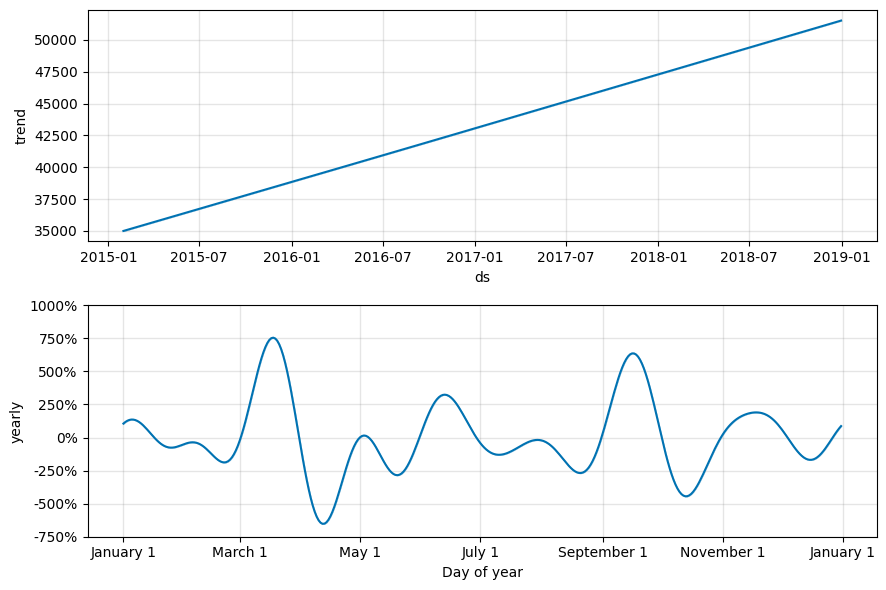

In [113]:
# Load monthly data
df_monthly = pd.read_csv("../data/processed/sales_monthly.csv", parse_dates=['order_date'])
df_monthly = df_monthly.rename(columns={'order_date':'ds','sales':'y'})
df_monthly = df_monthly.set_index('ds').asfreq('M').reset_index()

# Train/test split
test_periods = 12
train_monthly = df_monthly.iloc[:-test_periods].copy()
test_monthly  = df_monthly.iloc[-test_periods:].copy()

# Fit model
m_monthly = Prophet(yearly_seasonality=True, seasonality_mode='multiplicative')
m_monthly.fit(train_monthly)

# Forecast
future_monthly = m_monthly.make_future_dataframe(periods=test_periods, freq='M')
forecast_monthly = m_monthly.predict(future_monthly)
pred_monthly = forecast_monthly.set_index('ds')['yhat'].loc[test_monthly['ds'].min(): test_monthly['ds'].max()]
pred_monthly = pred_monthly.reindex(test_monthly['ds']).astype(float)

# Metrics
rmse_monthly = np.sqrt(mean_squared_error(test_monthly['y'].values, pred_monthly.values))
mae_monthly = mean_absolute_error(test_monthly['y'].values, pred_monthly.values)

metrics_monthly = pd.DataFrame({
    "Model":["Prophet (monthly)"],
    "RMSE":[rmse_monthly],
    "MAE":[mae_monthly]
})
display(metrics_monthly)

metrics_monthly.to_csv(os.path.join(METRICS_DIR, "prophet_monthly_metrics.csv"), index=False)
pred_monthly.to_csv(os.path.join(FC_DIR, "prophet_monthly_forecast.csv"), header=True)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train_monthly['ds'], train_monthly['y'], label="train")
plt.plot(test_monthly['ds'], test_monthly['y'], label="actual", marker='o')
plt.plot(pred_monthly.index, pred_monthly.values, label="prophet_forecast", marker='o')
plt.legend()
plt.title(f"Prophet Monthly Forecast (RMSE={rmse_monthly:.1f}, MAE={mae_monthly:.1f})")
plt.savefig(os.path.join(FIG_DIR, "prophet_monthly_forecast.png"))
plt.show()

# Components
m_monthly.plot_components(forecast_monthly)
plt.savefig(os.path.join(FIG_DIR, "prophet_monthly_components.png"))
plt.show()


# Prophet Modeling Results (Daily, Weekly, Monthly)

## Weekly Prophet
- RMSE: ~6502
- MAE: ~5287
- Captures yearly seasonality, smoother than daily.
- Good balance between detail and stability → useful for operational planning.

## Daily Prophet
- RMSE: ~2904
- MAE: ~2095
- Best performing model across granularities.
- Captures weekly cycles (weekday/weekend effects) and holiday peaks.
- Recommended for short-term/tactical forecasting (daily demand, staffing, promotions).

## Monthly Prophet
- RMSE: ~16280
- MAE: ~12598
- Underperforms badly compared to daily/weekly.
- Too coarse; misses seasonal details.
- Suitable only for long-term trend visualization, not precise forecasting.

---

## Insights
- **Prophet (daily)** gives the most accurate forecasts.
- **Prophet (weekly)** is a practical compromise between noise (daily) and smoothness (monthly).
- **Prophet (monthly)** is not reliable for forecasting, only for showing overall growth trends.
